- [什么是加权移动平均滤波（Weighted Moving Average Filtering）](#什么是加权移动平均滤波weighted-moving-average-filtering)
- [实现代码](#实现代码)


# 什么是加权移动平均滤波（Weighted Moving Average Filtering）

加权移动平均滤波（Weighted Moving Average Filtering）是一种对移动平均滤波的改进，它在计算滑动窗口内样本的平均值时为不同的样本赋予不同的权重，以便更好地适应信号的变化。

与移动平均滤波不同，加权移动平均滤波使用一个权重向量来对窗口内的样本进行加权平均。这个权重向量定义了每个样本在平均计算中的重要性。通常情况下，权重向量是根据一定的规则或特定的设计目标来确定的。

因此，这里常见的权重设计方法就有了，例如：

* **线性权重**：在滑动窗口中，最早的样本权重最小，最新的样本权重最大。这种权重设计假设信号的最新样本更重要，而旧样本的重要性逐渐减小。
* **高斯权重**：使用高斯分布函数来定义权重，使得距离当前样本较近的样本具有较高的权重，而距离较远的样本具有较低的权重。

那么，我们以**高斯权重**为例，来看看加权移动平均滤波如何实现。

> 关于**高斯函数**
> 高斯函数是一种连续的概率分布函数，具有钟形曲线的形状。它在统计学和信号处理中经常被使用，因为它具有许多良好的性质。

在加权移动平均滤波中，高斯权重函数被用于给予离当前时间点越近的数据点越高的权重，离当前时间点越远的数据点则具有较低的权重。这样做的目的是为了更加强调近期的数据点，同时减弱较远的数据点对平均值的影响，从而实现平滑效果。

其中，

$$
w(i) = \exp \left ( - \frac{(i - c)^2}{2 \sigma^2}  \right ) 
$$

这里 $w(i)$ 是第 $i$ 个数据点的权重，$c$ 是当前时间点，$\sigma$ 是高斯函数的标准差。这个权重函数将时间点 i 与当前时间点 c 的距离考虑在内，距离越近的数据点权重越高，距离越远的数据点权重越低。

在实际应用中，通常选择合适的标准差 σ 来控制权重函数的宽度，从而平衡平滑效果和对数据点的响应速度。

通过将每个数据点乘以对应的权重，然后将它们相加再除以权重的总和，可以得到加权移动平均滤波的结果。这样计算得到的平均值对近期数据的响应更强，对远期数据的响应较弱，从而实现了平滑效果。

# 实现代码

我们基于之前的 [信号采样基本概念 —— 4. 移动平均滤波（Moving Average Filtering）](https://blog.csdn.net/poisonchry/article/details/131158726) 的代码为例，对该代码修改后，于是有了：


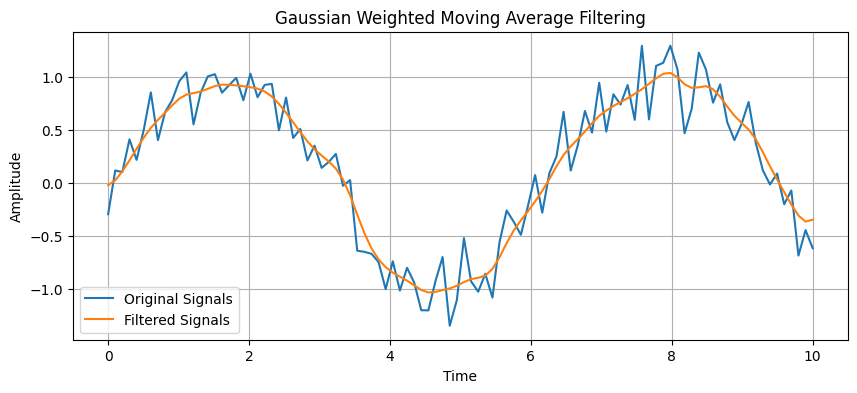

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_weighted_moving_average(signal, window_size, sigma):
    t = np.linspace(-window_size // 2, window_size // 2, window_size)
    weight = np.exp(-t**2 / (2 * sigma**2))  # 高斯权重

    # 归一化权重，使其总和为1
    weight /= np.sum(weight)

    return np.convolve(signal, weight, mode='same')

# 生成示例信号
t = np.linspace(0, 10, 100)  # 时间轴
signal = np.sin(t) + np.random.randn(100) * 0.2  # 添加噪声的正弦信号

# 进行加权移动平均滤波
filtered_signal = gaussian_weighted_moving_average(signal, window_size=10, sigma=2)

# 绘制原始信号和滤波后的信号
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Original Signals')
plt.plot(t, filtered_signal, label='Filtered Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Gaussian Weighted Moving Average Filtering')
plt.legend()
plt.grid(True)
plt.show()